#### Improvement
check 2 highly related variable

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import os
import sys

In [3]:
os.chdir(r"C:\Users\hanya\Desktop\MSBD5001 Group Project\Individual Project")

In [4]:
training_data = pd.read_csv('./train.csv')
test_data = pd.read_csv('./test.csv')
training_label = training_data['time']
data_corr = training_data.corr()['time']

In [5]:
col_drop = data_corr[abs(data_corr)<0.1]
col_drop.index

Index(['l1_ratio', 'random_state', 'n_features', 'scale'], dtype='object')

In [6]:
all_data = pd.concat([training_data.drop('time',axis=1), test_data.drop('id',axis=1)])
all_data.drop(col_drop.index,axis=1, inplace=True)

In [7]:
all_data.loc[all_data['n_jobs'] == -1, 'n_jobs'] = 32
all_data

,penalty,alpha,max_iter,n_jobs,n_samples,n_classes,n_clusters_per_class,n_informative,flip_y
0,none,0.0001,659,32,737,9,2,11,0.060257
1,l2,0.0001,395,32,243,7,3,7,0.059768
2,l1,0.0010,488,32,718,4,4,7,0.096493
3,l2,0.0010,501,4,713,10,5,10,0.032356
4,l2,0.0010,879,4,173,8,5,12,0.003609
5,none,0.0001,669,4,438,5,3,10,0.021112
6,l2,0.0100,259,2,577,7,2,7,0.020114
7,elasticnet,0.0010,503,2,964,2,3,9,0.062695
8,elasticnet,0.0100,206,2,212,6,4,7,0.013455
9,l2,0.0010,815,32,375,4,3,7,0.094464


In [8]:
pls = pd.Series(range(3), index=all_data.groupby('alpha').count().index)
all_data['alpha'].replace(pls, inplace=True)

In [9]:
pd.concat([all_data.iloc[:40, :], training_label], axis=1).corr()

,alpha,max_iter,n_jobs,n_samples,n_classes,n_clusters_per_class,n_informative,flip_y,time
alpha,1.000000,0.021633,-0.128807,0.088407,-0.103141,0.080518,0.158878,-0.320177,0.159422
max_iter,0.021633,1.000000,0.240719,-0.057803,-0.204532,0.230508,0.257183,0.085561,0.268352
n_jobs,-0.128807,0.240719,1.000000,-0.012265,-0.084667,-0.006730,-0.110207,0.368523,-0.120266
n_samples,0.088407,-0.057803,-0.012265,1.000000,0.108893,-0.216336,0.062691,0.328629,0.360832
n_classes,-0.103141,-0.204532,-0.084667,0.108893,1.000000,-0.078284,0.257059,-0.011639,0.215037
n_clusters_per_class,0.080518,0.230508,-0.006730,-0.216336,-0.078284,1.000000,0.262700,-0.194119,-0.207023
n_informative,0.158878,0.257183,-0.110207,0.062691,0.257059,0.262700,1.000000,-0.194895,0.256682
flip_y,-0.320177,0.085561,0.368523,0.328629,-0.011639,-0.194119,-0.194895,1.000000,0.188342
time,0.159422,0.268352,-0.120266,0.360832,0.215037,-0.207023,0.256682,0.188342,1.000000


In [10]:
all_data['n_samples_n_jobs'] = all_data['n_samples']/all_data['n_jobs']
all_data['max_iter_n_samples'] = all_data['max_iter']*all_data['n_samples']

In [11]:
all_data1 = all_data.copy()
all_data = pd.concat([all_data1['penalty'],(all_data.iloc[:, 1:] - all_data.iloc[:, 1:].mean())/ all_data.iloc[:, 1:].std()], axis = 1)
all_data1 = all_data.iloc[:,1:]
all_data1.iloc[:40,:].corr()

,alpha,max_iter,n_jobs,n_samples,n_classes,n_clusters_per_class,n_informative,flip_y,n_samples_n_jobs,max_iter_n_samples
alpha,1.000000,0.021633,-0.128807,0.088407,-0.103141,0.080518,0.158878,-0.320177,0.218847,0.061573
max_iter,0.021633,1.000000,0.240719,-0.057803,-0.204532,0.230508,0.257183,0.085561,-0.069990,0.651788
n_jobs,-0.128807,0.240719,1.000000,-0.012265,-0.084667,-0.006730,-0.110207,0.368523,-0.474033,0.172256
n_samples,0.088407,-0.057803,-0.012265,1.000000,0.108893,-0.216336,0.062691,0.328629,0.524015,0.622049
n_classes,-0.103141,-0.204532,-0.084667,0.108893,1.000000,-0.078284,0.257059,-0.011639,0.013210,0.035077
n_clusters_per_class,0.080518,0.230508,-0.006730,-0.216336,-0.078284,1.000000,0.262700,-0.194119,-0.108888,-0.082830
n_informative,0.158878,0.257183,-0.110207,0.062691,0.257059,0.262700,1.000000,-0.194895,0.236500,0.282802
flip_y,-0.320177,0.085561,0.368523,0.328629,-0.011639,-0.194119,-0.194895,1.000000,-0.013570,0.336292
n_samples_n_jobs,0.218847,-0.069990,-0.474033,0.524015,0.013210,-0.108888,0.236500,-0.013570,1.000000,0.329599
max_iter_n_samples,0.061573,0.651788,0.172256,0.622049,0.035077,-0.082830,0.282802,0.336292,0.329599,1.000000


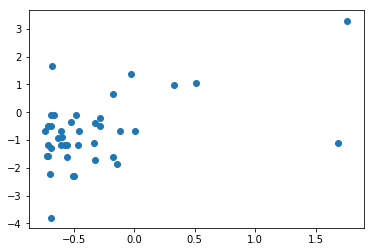

In [12]:
plt.scatter(all_data1['n_samples_n_jobs'].iloc[:40], np.log(training_label))

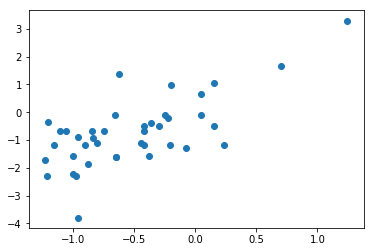

In [13]:
plt.scatter(all_data1['max_iter_n_samples'].iloc[:40], np.log(training_label))

In [14]:
new_data = pd.get_dummies(all_data[['penalty', 'max_iter_n_samples', 'n_samples_n_jobs']])

In [83]:
training_len = 40 #len(training_df_data)-test_training
test_training = len(training_data) - training_len
test_len = len(test_data)

training_label = training_data['time']
training_label = np.log(training_label)
X_train = new_data.iloc[:training_len, :] # training data--cross validation
X_train_test =  new_data.iloc[training_len:training_len+test_training, :] # training data--test
y_train = training_label.iloc[:training_len] # training labels--cross validation
y_train_test = training_label.iloc[-test_training:] # training label--test
x_test = new_data.iloc[-test_len:, :] # test data

#### Ridge

In [84]:
from sklearn.metrics import mean_squared_error, roc_auc_score, log_loss
import lightgbm as lgb
from sklearn.ensemble import BaggingRegressor
from sklearn.model_selection import cross_val_score
from tqdm import tqdm

In [85]:
from sklearn.linear_model import Ridge

In [86]:
params = np.linspace(0.1,10,num=100)
test_scores = []
for param in tqdm(params):
    clf1 = Ridge(alpha=param)
    test_score = cross_val_score(clf1, X_train, y_train, cv=10, scoring='neg_mean_squared_error')
    test_scores.append(np.mean(-test_score))

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:02<00:00, 40.64it/s]


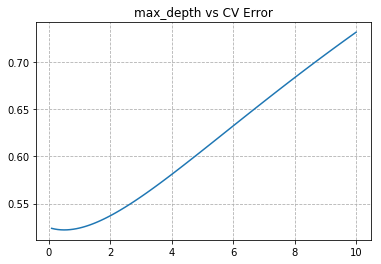

In [87]:
plt.plot(params, test_scores)
plt.grid(True, linestyle='--')
plt.title("max_depth vs CV Error");

In [109]:
clf1 = Ridge(alpha=6)
clf1.fit(X_train, y_train) 

Ridge(alpha=6, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [110]:
rst = pd.DataFrame(clf1.predict(x_test))
#np.exp(rst[rst<0].dropna())

In [111]:
clf1.coef_

array([ 0.84979476,  0.43970499,  0.49961191,  0.20919825, -0.32322897,
       -0.38558119])

In [112]:
abs(np.exp(clf1.predict(X_train)) - training_data['time']).mean()

0.8045667277397079

In [115]:
rst = np.exp(clf1.predict(x_test))
sss = pd.DataFrame(rst)
sss[sss>10].dropna()

,0
11,26.891546
13,72.332878
54,17.074332
96,15.045037


In [116]:
rt = pd.concat([pd.Series(range(len(rst))), pd.Series(rst)], axis=1)

In [117]:
rt.to_csv("./submissionv4_exponential_2features.csv")